In [376]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns

from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [377]:
project_path = r'C:\Users\kchanas\Documents\Learning\Kaggle\House_Prices'
train = pd.read_csv(os.path.join(project_path, r'data\train.csv')).set_index('Id')
test = pd.read_csv(os.path.join(project_path, r'data\test.csv')).set_index('Id')

In [378]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## New variables

In [379]:
train['GrLivAndBsmtArea'] = train['TotalBsmtSF'] + train['GrLivArea']
train['GardenArea'] = train['LotArea'] - train['GrLivArea']
train['BathsAboveGrd'] = train['FullBath'] + train['HalfBath']

test['GrLivAndBsmtArea'] = test['TotalBsmtSF'] + test['GrLivArea']
test['GardenArea'] = test['LotArea'] - test['GrLivArea']
test['BathsAboveGrd'] = test['FullBath'] + test['HalfBath']

## Train Test Split

In [380]:
X_train, X_test, y_train, y_test = train_test_split(train, train['SalePrice'], test_size=0.2, random_state=1)  

In [381]:
X_train.head()
X_train.info()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivAndBsmtArea,GardenArea,BathsAboveGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
922,90,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,Duplex,1.5Fin,5,7,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1084,Unf,0,188,1272,GasA,Gd,Y,SBrkr,1272,928,0,2200,2,0,2,2,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,70,0,0,0,0,NaN,GdPrv,NaN,0,9,2008,WD,Normal,145900,3472,6577,4
521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,7,1900,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseA,694,600,0,1294,0,0,2,0,3,2,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,220,114,210,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,106250,1294,9506,2
402,20,RL,65.0,8767,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1286,1310,GasA,Ex,Y,SBrkr,1310,0,0,1310,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2005.0,Fin,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,164990,2620,7457,2
281,60,RL,82.0,11287,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,6,1989,1989,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,421,Unf,0,386,807,GasA,Gd,Y,SBrkr,1175,807,0,1982,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1989.0,Fin,2,575,TA,TA,Y,0,84,0,196,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,228500,2789,9305,3
1402,60,RL,62.0,7415,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,GLQ,759,Unf,0,80,839,GasA,Ex,Y,SBrkr,864,729,0,1593,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,2004.0,Fin,2,398,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,193000,2432,5822,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 922 to 1062
Data columns (total 83 columns):
MSSubClass          1168 non-null int64
MSZoning            1168 non-null object
LotFrontage         959 non-null float64
LotArea             1168 non-null int64
Street              1168 non-null object
Alley               71 non-null object
LotShape            1168 non-null object
LandContour         1168 non-null object
Utilities           1168 non-null object
LotConfig           1168 non-null object
LandSlope           1168 non-null object
Neighborhood        1168 non-null object
Condition1          1168 non-null object
Condition2          1168 non-null object
BldgType            1168 non-null object
HouseStyle          1168 non-null object
OverallQual         1168 non-null int64
OverallCond         1168 non-null int64
YearBuilt           1168 non-null int64
YearRemodAdd        1168 non-null int64
RoofStyle           1168 non-null object
RoofMatl            1168 non-null obje

## Variables types

In [382]:
num_vars = [var for var in X_train.columns if X_train[var].dtypes != 'O' and var not in 'SalePrice']

year_vars = [var for var in num_vars if 'Year' in var or 'Yr' in var]
num_vars = [var for var in num_vars if var not in year_vars]
discrete_vars = [var for var in num_vars if X_train[var].nunique() <= 20]
num_vars = [var for var in num_vars if var not in discrete_vars]
cat_vars = [var for var in X_train.columns if X_train[var].dtypes == 'O']

print('Numeric variables: ', num_vars)
print('Discrete variables: ', discrete_vars)
print('Year variables: ', year_vars)
print('Categorical variables: ', cat_vars)

Numeric variables:  ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'GrLivAndBsmtArea', 'GardenArea']
Discrete variables:  ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'BathsAboveGrd']
Year variables:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
Categorical variables:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Hea

## Missing values

In [383]:
cat_vars_with_na = [col for col in cat_vars if (train[col].isnull().sum() > 0) or (test[col].isnull().sum() > 0)]
train[cat_vars_with_na].isnull().mean().sort_values(ascending=False)
print(cat_vars_with_na)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
Exterior1st     0.000000
SaleType        0.000000
Exterior2nd     0.000000
KitchenQual     0.000000
Functional      0.000000
MSZoning        0.000000
dtype: float64

['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [384]:
X_train[cat_vars_with_na] = X_train[cat_vars_with_na].fillna('Missing')
X_test[cat_vars_with_na] = X_test[cat_vars_with_na].fillna('Missing')
test[cat_vars_with_na] = test[cat_vars_with_na].fillna('Missing')

In [385]:
num_vars_with_na = [col for col in num_vars if (train[col].isnull().sum() > 0) or (test[col].isnull().sum() > 0)]
train[num_vars_with_na].isnull().mean().sort_values(ascending=False)

LotFrontage         0.177397
MasVnrArea          0.005479
GrLivAndBsmtArea    0.000000
GarageArea          0.000000
TotalBsmtSF         0.000000
BsmtUnfSF           0.000000
BsmtFinSF2          0.000000
BsmtFinSF1          0.000000
dtype: float64

In [386]:
for var in num_vars_with_na:
    var_median = X_train[var].median()
    X_train[var] = X_train[var].fillna(var_median)
    X_test[var] = X_test[var].fillna(var_median)
    test[var] = test[var].fillna(var_median)

In [387]:
discrete_vars_with_na = [col for col in discrete_vars if (train[col].isnull().sum() > 0) or (test[col].isnull().sum() > 0)]
train[discrete_vars_with_na].isnull().mean().sort_values(ascending=False)

GarageCars      0.0
BsmtHalfBath    0.0
BsmtFullBath    0.0
dtype: float64

In [388]:
for var in discrete_vars_with_na:
    var_mode = X_train[var].mode().iloc[0]
    X_train[var] = X_train[var].fillna(var_mode)
    X_test[var] = X_test[var].fillna(var_mode)
    test[var] = test[var].fillna(var_mode)

In [389]:
X_train = X_train.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)
X_test = X_test.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)
test = test.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)

cat_vars = [var for var in cat_vars if var not in ['PoolQC','MiscFeature','Alley','Fence']]

In [390]:
[col for col in X_train.columns if X_train[col].isnull().sum() > 0]
[col for col in X_test.columns if X_test[col].isnull().sum() > 0]
[col for col in test.columns if test[col].isnull().sum() > 0]

['GarageYrBlt']

['GarageYrBlt']

['GarageYrBlt']

## Temporal variables

In [391]:
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)
    test = elapsed_years(test, var)
    
max_garage_blt = X_train['GarageYrBlt'].max()

X_train['GarageYrBlt'] = np.where(X_train['GarageType']=='Missing', max_garage_blt, X_train['GarageYrBlt'])
X_test['GarageYrBlt'] = np.where(X_test['GarageType']=='Missing', max_garage_blt, X_test['GarageYrBlt'])
test['GarageYrBlt'] = np.where(test['GarageType']=='Missing', max_garage_blt, test['GarageYrBlt'])

X_train[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
Id,,,,
922,108,5,107.0,2008
521,108,8,107.0,2008
402,1,1,1.0,2006
281,18,18,18.0,2007
1402,4,4,4.0,2008


In [392]:
[col for col in X_train.columns if X_train[col].isnull().sum() > 0]
[col for col in X_test.columns if X_test[col].isnull().sum() > 0]
[col for col in test.columns if test[col].isnull().sum() > 0]

[]

[]

['GarageYrBlt']

In [393]:
test[test['GarageYrBlt'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivAndBsmtArea,GardenArea,BathsAboveGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2127,60,RM,57.0,8094,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,98,25,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,Missing,Detchd,NaN,Missing,1.0,360.0,Missing,Missing,Y,64,0,180,0,0,0,1000,9,2008,WD,Normal,3226.0,6110,2
2577,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,84,8,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Missing,Detchd,NaN,Missing,2.0,480.0,Missing,Missing,Y,174,0,212,0,0,0,0,3,2007,WD,Alloca,2687.0,7232,2


In [394]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(max_garage_blt)

## Numerical variables

In [395]:
pt = PowerTransformer()
X_train[num_vars] = pt.fit_transform(X_train[num_vars])
X_test[num_vars] = pt.transform(X_test[num_vars])
test[num_vars] = pt.transform(test[num_vars])

## Categorical variables

In [396]:
frequent_labels = {}

def find_frequent_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() /df.shape[0]
    return tmp[tmp > rare_perc].index.tolist()

for var in cat_vars:
    frequent_labels[var] = find_frequent_labels(X_train, var, 0.01)
    

In [397]:
print(frequent_labels)

{'MSZoning': ['FV', 'RH', 'RL', 'RM'], 'Street': ['Pave'], 'LotShape': ['IR1', 'IR2', 'Reg'], 'LandContour': ['Bnk', 'HLS', 'Low', 'Lvl'], 'Utilities': ['AllPub'], 'LotConfig': ['Corner', 'CulDSac', 'FR2', 'Inside'], 'LandSlope': ['Gtl', 'Mod'], 'Neighborhood': ['Blmngtn', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber'], 'Condition1': ['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], 'Condition2': ['Norm'], 'BldgType': ['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], 'HouseStyle': ['1.5Fin', '1Story', '2Story', 'SFoyer', 'SLvl'], 'RoofStyle': ['Gable', 'Hip'], 'RoofMatl': ['CompShg'], 'Exterior1st': ['AsbShng', 'BrkFace', 'CemntBd', 'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing'], 'Exterior2nd': ['AsbShng', 'BrkFace', 'CmentBd', 'HdBoard', 'MetalSd', 'Plywood', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'

In [398]:
for var in cat_vars:
    X_train[var] = np.where(X_train[var].isin(frequent_labels[var]), X_train[var], 'Other')
    X_test[var] = np.where(X_test[var].isin(frequent_labels[var]), X_test[var], 'Other')
    test[var] = np.where(test[var].isin(frequent_labels[var]), test[var], 'Other')

# Discrete variables

Variables like OverallCond, GarageCars have monotonic relationship with Sale Price, but only in the part of their distribution (for OverallCond the monotonic relationship is only up to grade 5, for higher values there is no monotonic relationship).

In [399]:
X_train['OverallCond'] = np.where(X_train['OverallCond'] >= 5, 5, X_train['OverallCond'])
X_test['OverallCond'] = np.where(X_test['OverallCond'] >= 5, 5, X_test['OverallCond'])
test['OverallCond'] = np.where(test['OverallCond'] >= 5, 5, test['OverallCond'])

X_train['GarageCars'] = np.where(X_train['GarageCars'] >= 3, 3, X_train['GarageCars'])
X_test['GarageCars'] = np.where(X_test['GarageCars'] >= 3, 3, X_test['GarageCars'])
test['GarageCars'] = np.where(test['GarageCars'] >= 3, 3, test['GarageCars'])

# Encode categorical variables

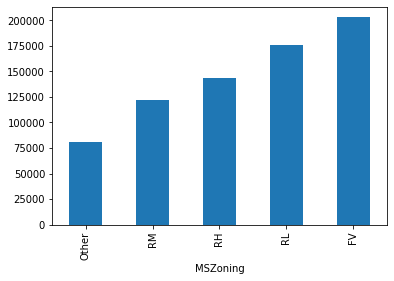

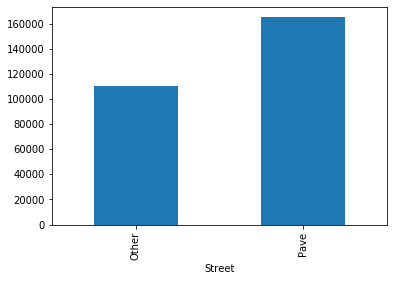

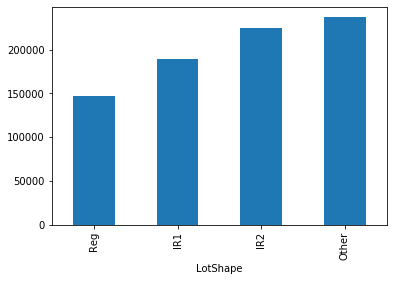

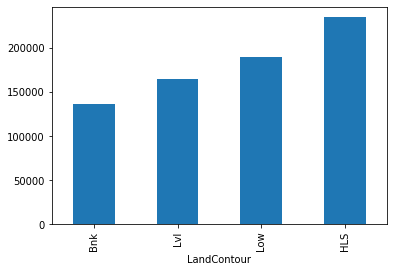

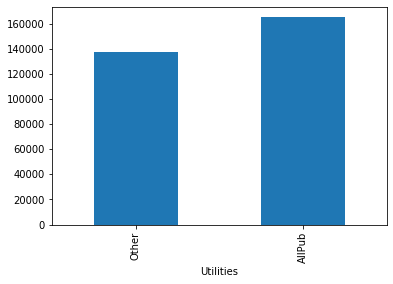

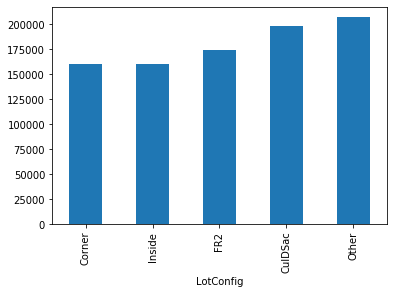

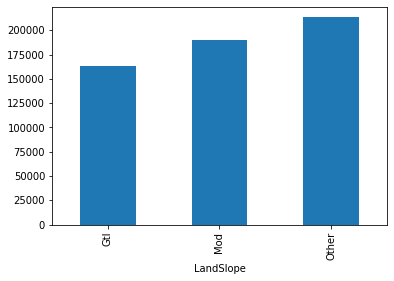

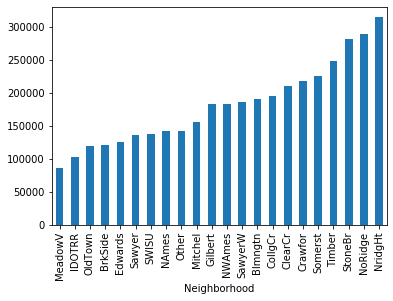

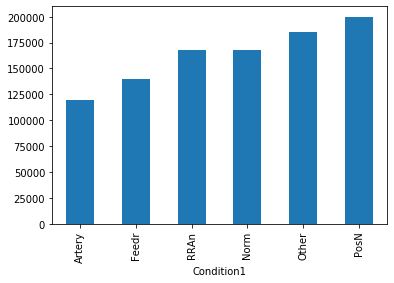

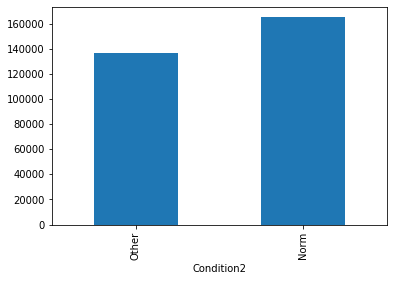

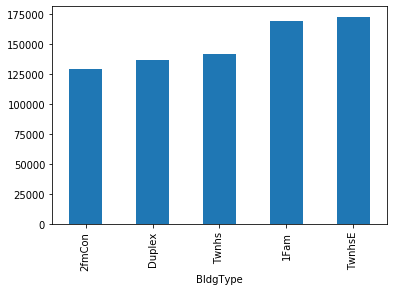

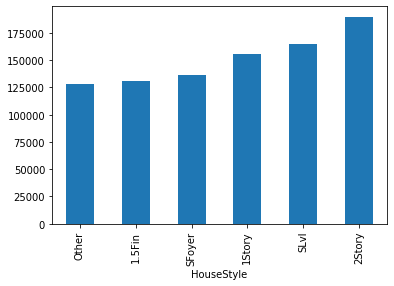

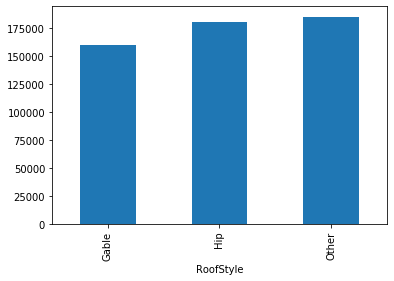

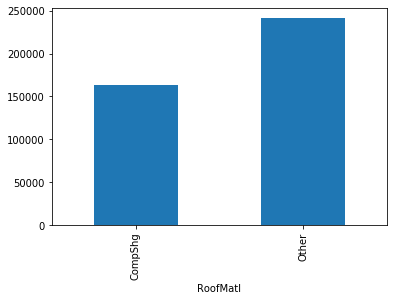

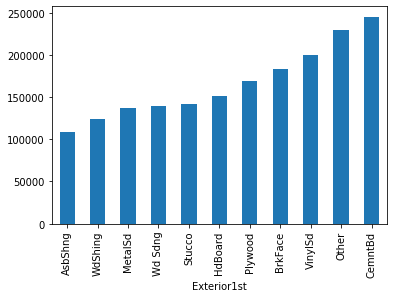

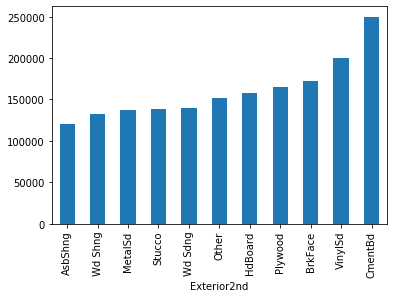

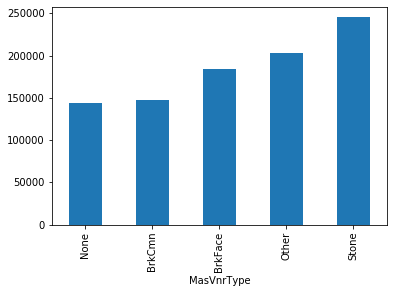

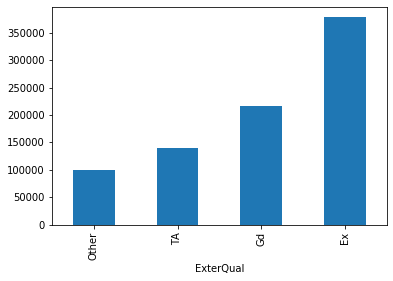

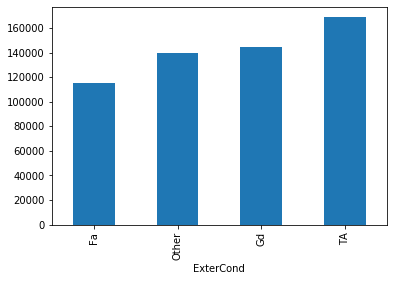

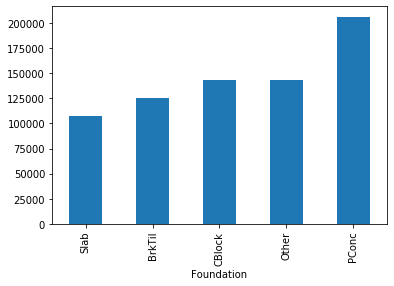

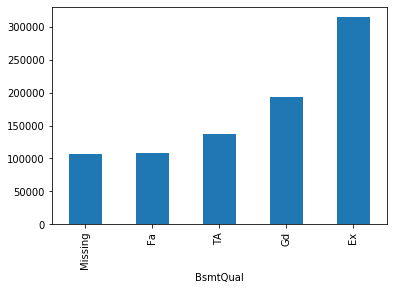

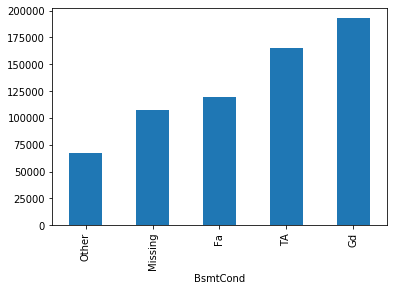

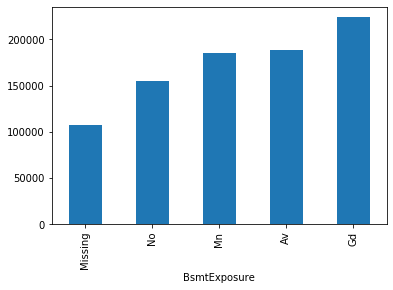

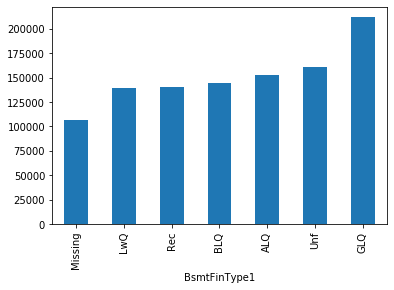

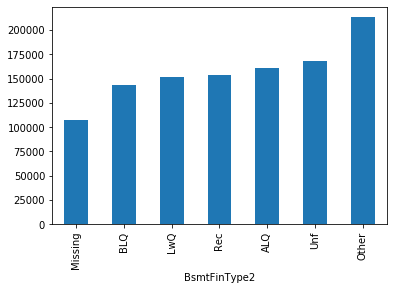

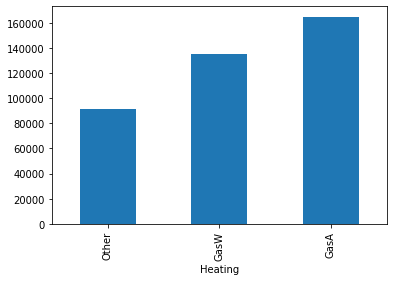

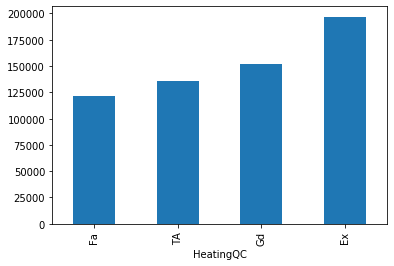

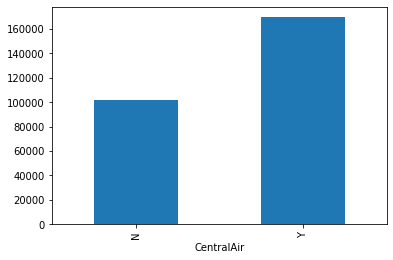

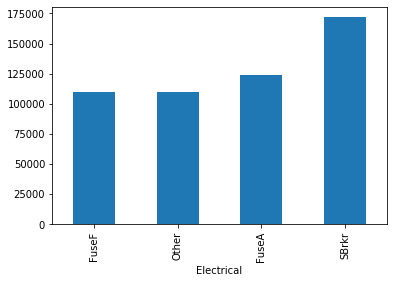

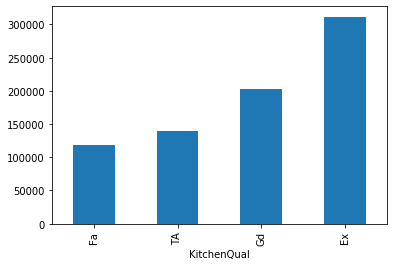

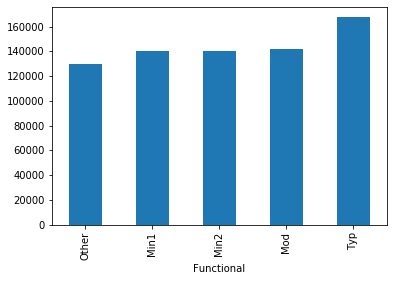

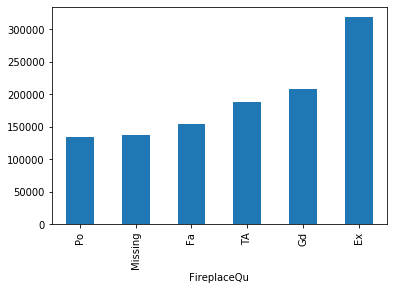

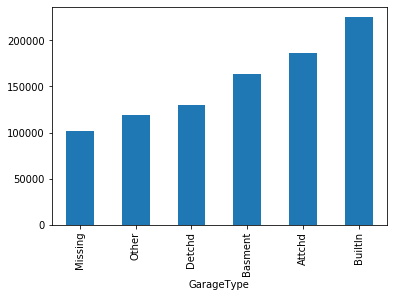

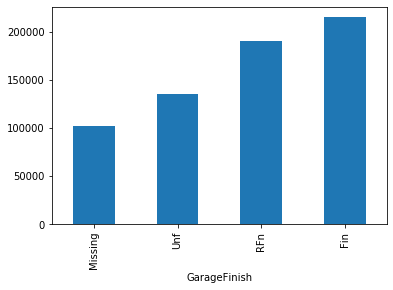

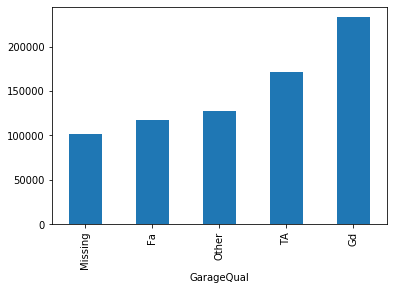

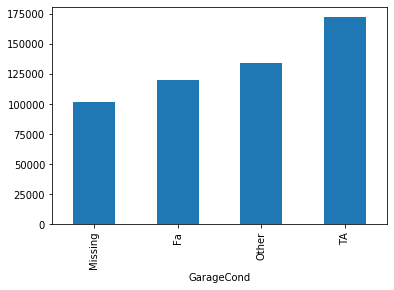

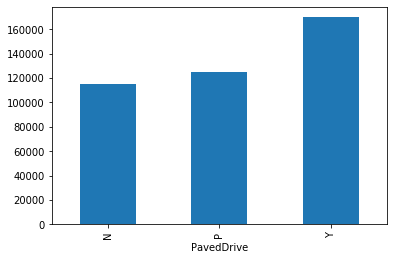

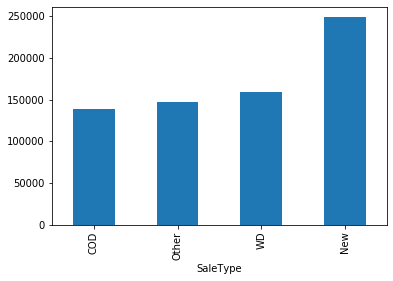

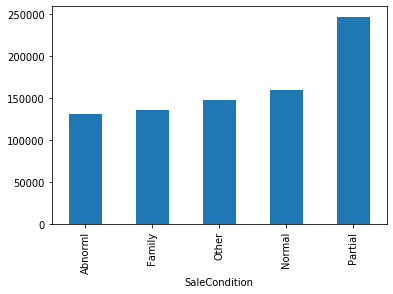

In [400]:
def encode_categories(train, test, test_lb, var):
    ordered_categories = train.groupby(var)['SalePrice'].median().sort_values().index
    train.groupby(var)['SalePrice'].median().sort_values(ascending=True).plot.bar()
    plt.show()
    ordered_labels = {k: i for i, k in enumerate(ordered_categories, 0)}
    train[var] = train[var].map(ordered_labels)
    test[var] = test[var].map(ordered_labels)
    test[var] = test[var].fillna(train[var].mode().iloc[0])
    test_lb[var] = test_lb[var].map(ordered_labels)
    test_lb[var] = test_lb[var].fillna(train[var].mode().iloc[0])
    
for var in cat_vars:
    encode_categories(X_train, X_test, test, var)

In [401]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivAndBsmtArea,GardenArea,BathsAboveGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
922,90,3,-0.046853,-0.076360,1,0,1,1,1,0,4,1,1,1,1,5,5,108,5,0,0,2,2,0,-0.835334,1,3,2,2,3,1,4,1.070444,5,-0.344636,-0.738332,0.495982,2,2,1,3,0.410889,1.206368,0,1.279270,2,0,2,2,4,2,1,9,4,0,1,0,107.0,0,0,-2.565187,0,0,0,-0.962505,0.895953,-0.411301,0,-0.304319,0,0,9,2008,2,3,145900,1.101861,-0.243582,4
521,190,3,-0.392785,0.327824,1,0,1,1,1,0,2,3,1,0,5,4,5,108,8,0,0,2,2,0,-0.835334,1,3,1,0,1,0,0,-1.362385,0,-0.344636,-2.053581,-3.137031,2,1,0,2,-1.486152,1.127303,0,-0.328128,0,0,2,0,3,2,1,7,4,0,1,0,107.0,0,0,-2.565187,0,0,0,1.111054,1.129371,2.434012,0,-0.304319,0,0,8,2008,2,3,106250,-1.960623,0.348308,2
402,20,3,-0.143340,-0.078574,1,1,1,1,1,0,14,3,1,3,3,7,5,1,1,0,0,8,9,0,-0.835334,2,3,4,3,3,3,6,-0.701864,5,-0.344636,1.354299,0.575473,2,3,1,3,0.501841,-0.853809,0,-0.291357,0,0,2,0,3,1,2,6,4,1,4,4,1.0,3,2,-0.292312,3,3,2,-0.962505,-1.078858,-0.411301,0,-0.304319,0,0,7,2006,3,4,164990,0.152355,-0.046861,2
281,60,3,0.626159,0.414103,1,0,1,1,1,0,12,3,1,3,5,7,5,18,18,0,0,6,7,2,1.309082,2,3,2,3,3,3,6,0.470521,5,-0.344636,-0.164851,-0.537816,2,2,1,3,0.165245,1.181578,0,0.960071,0,0,2,1,3,1,2,7,4,1,3,4,18.0,3,2,0.500314,3,3,2,-0.962505,0.982818,-0.411301,196,-0.304319,0,0,1,2007,2,3,228500,0.357599,0.312716,3
1402,60,3,-0.291537,-0.403086,1,1,1,1,1,0,10,3,1,3,5,6,5,4,4,0,0,8,9,0,-0.835334,1,3,4,2,3,1,6,0.828531,5,-0.344636,-1.209415,-0.462299,2,3,1,3,-0.794601,1.163225,0,0.296746,1,0,2,1,3,1,1,8,4,1,3,4,4.0,3,2,-0.301690,3,3,2,0.853227,0.928766,-0.411301,0,-0.304319,0,0,4,2008,2,3,193000,-0.088108,-0.429756,3


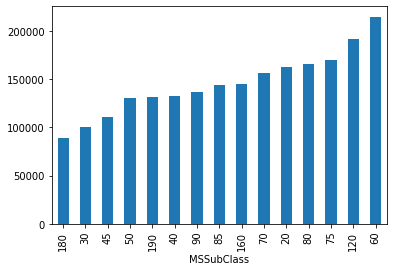

In [402]:
X_train.groupby('MSSubClass')['SalePrice'].median().sort_values(ascending=True).plot.bar()

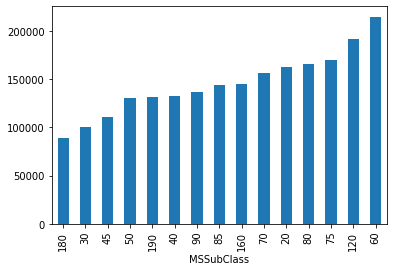

In [403]:
encode_categories(X_train, X_test, test, 'MSSubClass')

In [404]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GrLivAndBsmtArea,GardenArea,BathsAboveGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
922,6,3,-0.046853,-0.076360,1,0,1,1,1,0,4,1,1,1,1,5,5,108,5,0,0,2,2,0,-0.835334,1,3,2,2,3,1,4,1.070444,5,-0.344636,-0.738332,0.495982,2,2,1,3,0.410889,1.206368,0,1.279270,2,0,2,2,4,2,1,9,4,0,1,0,107.0,0,0,-2.565187,0,0,0,-0.962505,0.895953,-0.411301,0,-0.304319,0,0,9,2008,2,3,145900,1.101861,-0.243582,4
521,4,3,-0.392785,0.327824,1,0,1,1,1,0,2,3,1,0,5,4,5,108,8,0,0,2,2,0,-0.835334,1,3,1,0,1,0,0,-1.362385,0,-0.344636,-2.053581,-3.137031,2,1,0,2,-1.486152,1.127303,0,-0.328128,0,0,2,0,3,2,1,7,4,0,1,0,107.0,0,0,-2.565187,0,0,0,1.111054,1.129371,2.434012,0,-0.304319,0,0,8,2008,2,3,106250,-1.960623,0.348308,2
402,10,3,-0.143340,-0.078574,1,1,1,1,1,0,14,3,1,3,3,7,5,1,1,0,0,8,9,0,-0.835334,2,3,4,3,3,3,6,-0.701864,5,-0.344636,1.354299,0.575473,2,3,1,3,0.501841,-0.853809,0,-0.291357,0,0,2,0,3,1,2,6,4,1,4,4,1.0,3,2,-0.292312,3,3,2,-0.962505,-1.078858,-0.411301,0,-0.304319,0,0,7,2006,3,4,164990,0.152355,-0.046861,2
281,14,3,0.626159,0.414103,1,0,1,1,1,0,12,3,1,3,5,7,5,18,18,0,0,6,7,2,1.309082,2,3,2,3,3,3,6,0.470521,5,-0.344636,-0.164851,-0.537816,2,2,1,3,0.165245,1.181578,0,0.960071,0,0,2,1,3,1,2,7,4,1,3,4,18.0,3,2,0.500314,3,3,2,-0.962505,0.982818,-0.411301,196,-0.304319,0,0,1,2007,2,3,228500,0.357599,0.312716,3
1402,14,3,-0.291537,-0.403086,1,1,1,1,1,0,10,3,1,3,5,6,5,4,4,0,0,8,9,0,-0.835334,1,3,4,2,3,1,6,0.828531,5,-0.344636,-1.209415,-0.462299,2,3,1,3,-0.794601,1.163225,0,0.296746,1,0,2,1,3,1,1,8,4,1,3,4,4.0,3,2,-0.301690,3,3,2,0.853227,0.928766,-0.411301,0,-0.304319,0,0,4,2008,2,3,193000,-0.088108,-0.429756,3


In [405]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivAndBsmtArea,GardenArea,BathsAboveGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,10.0,2,0.541050,0.471383,1,0,1,1,1,0,7,1,1,3,3,5,5,49,49,0,0,8,9,0,-0.835334,1,3,2,2,3,1,2,0.531196,2,2.901553,-0.473960,-0.362024,2,1.0,1,3,-0.680421,-0.853809,0,-1.418174,0.0,0.0,1,0,2,1,1.0,5,4,0,1,4,49.0,1,1.0,1.166268,3,3,2,0.964679,-1.078858,-0.411301,0,3.286014,0,0,6,2010,2,3,-1.053442,0.552396,1
1462,10.0,3,0.583765,0.874390,1,1,1,1,0,0,7,3,1,3,3,6,5,52,52,1,0,3,4,2,1.076081,1,3,2,2,3,1,4,0.958795,5,-0.344636,-0.116827,0.614987,2,1.0,1,3,0.546291,-0.853809,0,-0.248243,0.0,0.0,1,1,3,1,2.0,6,4,0,1,4,52.0,1,1.0,-0.713665,3,3,2,1.293227,0.583793,-0.411301,0,-0.304319,0,12500,6,2010,2,3,0.199360,0.879620,2
1463,14.0,3,0.277609,0.813085,1,1,1,1,1,0,10,3,1,3,5,5,5,13,12,0,0,8,9,0,-0.835334,1,3,4,3,3,1,6,0.855532,5,-0.344636,-0.935289,-0.256192,2,2.0,1,3,-0.570411,1.156081,0,0.364282,0.0,0.0,2,1,3,1,1.0,6,4,1,3,4,13.0,3,2.0,0.085488,3,3,2,1.099204,0.557352,-0.411301,0,-0.304319,0,0,3,2010,2,3,0.073275,0.775890,3
1464,14.0,3,0.454625,0.173255,1,1,1,1,1,0,10,3,1,3,5,6,5,12,12,0,0,8,9,2,0.616158,1,3,4,2,3,1,6,0.681791,5,-0.344636,-0.322763,-0.260763,2,3.0,1,3,-0.577170,1.149965,0,0.317535,0.0,0.0,2,1,3,1,2.0,7,4,1,4,4,12.0,3,2.0,0.030966,3,3,2,1.266102,0.583793,-0.411301,0,-0.304319,0,0,6,2010,2,3,0.038930,0.139440,3
1465,13.0,3,-1.351249,-1.158157,1,1,3,1,1,0,19,3,1,4,3,8,5,18,18,0,0,5,6,0,-0.835334,2,3,4,3,3,1,4,0.218461,5,-0.344636,0.987254,0.512769,2,3.0,1,3,0.430270,-0.853809,0,-0.360659,0.0,0.0,2,0,2,1,2.0,5,4,0,1,4,18.0,2,2.0,0.193812,3,3,2,-0.962505,0.971309,-0.411301,0,3.286035,0,0,1,2010,2,3,0.077074,-1.072736,2


## Feature scaling

In [406]:
ss = StandardScaler()

X_train = X_train.drop('SalePrice', axis=1)
X_test = X_test.drop('SalePrice', axis=1)

X_train = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns, index = X_test.index)
test = pd.DataFrame(ss.transform(test), columns=test.columns, index = test.index)
X_train.head()
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivAndBsmtArea,GardenArea,BathsAboveGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
922,-0.882943,0.361626,-0.046853,-0.076360,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,-1.041421,-2.333072,0.106092,-2.882178,-1.802319,-0.828481,0.22196,2.372968,-0.848541,-0.506716,-0.135309,-1.381651,-1.495637,-0.770043,-0.835334,-0.724563,0.325226,-0.655392,-0.672194,0.087531,-0.609160,-0.226722,1.070444,0.327610,-0.344636,-0.738332,0.495982,0.14264,-0.165354,0.260080,0.260130,0.410889,1.206368,-0.112458,1.279270,2.997177,-0.246796,0.784304,3.211155,1.378044,4.335645,-0.807123,1.507705,0.243828,-0.955827,-0.953355,-2.678136,2.470810,-1.962758,-2.439277,-2.565187,-3.669112,-3.813887,-3.758568,-0.962505,0.895953,-0.411301,-0.117533,-0.304319,-0.064715,-0.090533,1.007787,0.133139,-0.007204,0.188693,1.101861,-0.243582,2.591685
521,-1.400783,0.361626,-0.392785,0.327824,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,-1.382430,0.249893,0.106092,-4.389739,1.240845,-1.558795,0.22196,2.372968,-0.702569,-0.506716,-0.135309,-1.381651,-1.495637,-0.770043,-0.835334,-0.724563,0.325226,-1.505945,-3.242154,-4.559553,-1.536799,-2.690080,-1.362385,-4.184757,-0.344636,-2.053581,-3.137031,0.14264,-1.209317,-3.844969,-1.925714,-1.486152,1.127303,-0.112458,-0.328128,-0.839209,-0.246796,0.784304,-0.753569,0.155906,4.335645,-0.807123,0.277527,0.243828,-0.955827,-0.953355,-2.678136,2.470810,-1.962758,-2.439277,-2.565187,-3.669112,-3.813887,-3.758568,1.111054,1.129371,2.434012,-0.117533,-0.304319,-0.064715,-0.090533,0.635760,0.133139,-0.007204,0.188693,-1.960623,0.348308,0.060675
402,0.152736,0.361626,-0.143340,-0.078574,0.050746,1.007382,-0.090707,0.029273,0.004747,-0.218285,0.663625,0.249893,0.106092,0.132944,-0.280737,0.632147,0.22196,-1.156800,-1.043169,-0.506716,-0.135309,0.919350,0.961825,-0.770043,-0.835334,1.020364,0.325226,1.045714,0.612786,0.087531,1.246118,1.004957,-0.701864,0.327610,-0.344636,1.354299,0.575473,0.14264,0.878610,0.260080,0.260130,0.501841,-0.853809,-0.112458,-0.291357,-0.839209,-0.246796,0.784304,-0.753569,0.155906,-0.222441,0.710944,-0.337562,0.243828,0.586170,1.245826,0.565060,-1.076914,1.425175,0.314783,-0.292312,0.287973,0.299336,0.289387,-0.962505,-1.078858,-0.411301,-0.117533,-0.304319,-0.064715,-0.090533,0.263732,-1.376628,2.096239,1.336575,0.152355,-0.046861,0.060675
281,1.188416,0.361626,0.626159,0.414103,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,0.322616,0.249893,0.106092,0.132944,1.240845,0.632147,0.22196,-0.595996,-0.215999,-0.506716,-0.135309,0.152349,0.259693,0.733988,1.309082,1.020364,0.325226,-0.655392,0.612786,0.087531,1.246118,1.004957,0.470521,0.327610,-0.344636,-0.164851,-0.537816,0.14264,-0.165354,0.260080,0.260130,0.165245,1.181578,-0.112458,0.960071,-0.839209,-0.246796,0.784304,1.228793,0.155906,-0.222441,0.710944,0.277527,0.243828,0.586170,0.512766,0.565060,-0.507939,1.425175,0.314783,0.500314,0.287973,0.299336,0.289387,-0.962505,0.982818,-0.411301,6.186724,-0.304319,-0.064715,-0.090533,-1.968434,-0.621744,-0.007204,0.188693,0.357599,0.312716,1.326180
1402,1.188416,0.361626,-0.291537,-0.403086,0.050746,1.007382,-0.090707,0.029273,0.004747,-0.218

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivAndBsmtArea,GardenArea,BathsAboveGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
259,1.188416,0.361626,0.541050,0.603996,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,0.663625,0.249893,0.106092,0.132944,1.240845,0.632147,0.22196,-0.958869,-0.751226,-0.506716,-0.135309,0.919350,0.961825,0.733988,1.177617,1.020364,0.325226,1.045714,0.612786,0.087531,-0.609160,1.004957,0.385037,0.327610,-0.344636,0.299379,-0.176607,0.14264,0.878610,0.26008,0.26013,-0.454524,1.186390,-0.112458,0.653283,-0.839209,-0.246796,0.784304,1.228793,0.155906,-0.222441,0.710944,0.277527,0.243828,0.586170,0.512766,0.565060,-0.876099,0.295864,0.314783,0.451912,0.287973,0.299336,0.289387,-0.962505,1.046743,-0.411301,7.762789,-0.304319,-0.064715,-0.090533,-0.480323,0.133139,-0.007204,0.188693,0.317080,0.539112,1.32618
268,0.670576,0.361626,-0.392785,-0.161586,0.050746,-0.722945,-2.393867,0.029273,0.004747,3.644693,-0.700412,0.249893,0.106092,0.132944,-2.563110,-0.828481,0.22196,1.086417,-0.556598,-0.506716,-0.135309,-0.998151,-0.793505,-0.770043,-0.835334,-0.724563,0.325226,1.045714,-0.672194,0.087531,-0.609160,-2.074240,0.410296,0.327610,-0.344636,-0.275379,-0.747329,0.14264,0.878610,0.26008,0.26013,-0.178547,1.160964,9.159370,1.268100,-0.839209,-0.246796,0.784304,1.228793,1.378044,-0.222441,0.710944,0.892616,0.243828,0.586170,1.245826,-1.056538,1.198984,-0.833447,-1.062247,-1.074460,0.287973,0.299336,0.289387,1.166592,0.397836,-0.411301,-0.117533,-0.304319,-0.064715,-0.090533,0.263732,0.133139,-0.007204,0.188693,0.501127,-0.332329,1.32618
289,0.152736,0.361626,0.047887,0.141937,0.050746,1.007382,-0.090707,0.029273,0.004747,-0.218285,-0.870916,0.249893,0.106092,0.132944,-0.280737,-0.828481,0.22196,0.228716,1.000427,-0.506716,-0.135309,-1.381651,-1.495637,0.733988,0.750259,-0.724563,-1.785128,-0.655392,-0.672194,0.087531,-0.609160,-0.842561,0.508534,0.327610,-0.344636,-0.056235,-0.362024,0.14264,-1.209317,0.26008,0.26013,-0.666447,-0.853809,-0.112458,-1.405077,-0.839209,-0.246796,-1.047831,-0.753569,0.155906,-0.222441,-0.807123,-0.952650,0.243828,-0.955827,-0.953355,-1.056538,0.228381,-0.833447,-1.062247,-0.871950,0.287973,0.299336,0.289387,-0.962505,-1.078858,-0.411301,-0.117533,-0.304319,-0.064715,-0.090533,-1.596406,1.642905,-0.007204,0.188693,-1.046774,0.242621,-1.20483
650,-2.436463,-2.182825,-3.031267,-2.945552,0.050746,-0.722945,-0.090707,0.029273,0.004747,-0.218285,-1.723439,0.249893,0.106092,-1.374617,-1.041528,-1.558795,0.22196,0.030785,0.708485,-0.506716,-0.135309,1.686350,1.312891,-0.770043,-0.835334,-0.724563,0.325226,-0.655392,0.612786,0.087531,1.246118,-0.842561,-0.106731,1.230084,2.902368,-2.053581,-0.971348,0.14264,-0.165354,0.26008,0.26013,-1.793530,-0.853809,-0.112458,-2.445171,1.078984,-0.246796,-1.047831,-0.753569,-2.288369,-0.222441,-0.807123,-2.182828,0.243828,-0.955827,-0.953355,-2.678136,2.470810,-1.962758,-2.439277,-2.565187,-3.669112,-3.813887,0.289387,-0.962505,-1.078858,-0.411301,-0.117533,-0.304319,-0.064715,-0.090533,2.123870,-0.621744,-0.007204,0.188693,-2.033515,-2.366853,-1.20483
1234,0.152736,0.361626,0.047887,0.560105,0.050746,1.007382,-0.090707,0.029273,0.004747,-0.218285,-0.52

## Outliers Removing

In [407]:
iso_forest = IsolationForest(contamination=0.01, n_estimators=300, random_state=1)

outliers = pd.Series(iso_forest.fit_predict(X_train), index=X_train.index, name='Outlier')
outliers.head()

Id
922     1
521    -1
402     1
281     1
1402    1
Name: Outlier, dtype: int32

In [408]:
outliers.value_counts()

 1    1156
-1      12
Name: Outlier, dtype: int64

In [409]:
X_train = X_train[X_train.index.isin(outliers[outliers == 1].index)]
y_train = y_train[y_train.index.isin(outliers[outliers == 1].index)]
X_train.shape

(1156, 78)

In [410]:
X_train.to_csv(os.path.join(project_path, r'data\X_train.csv'))
X_test.to_csv(os.path.join(project_path, r'data\X_test.csv'))
y_train.to_csv(os.path.join(project_path, r'data\y_train.csv'))
y_test.to_csv(os.path.join(project_path, r'data\y_test.csv'))
test.to_csv(os.path.join(project_path, r'data\test_lb.csv'))